In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# قراءة ملف csv
df = pd.read_csv('heart_disease_uci.csv')

# عرض معلومات 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [3]:
# عرض اول 5 صفوف
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
# حساب عدد القيم الفارغة في كل عمود من إطار البيانات
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [5]:
# حساب نسبة القيم الفارغة في إطار البيانات بالنسبة المئوية
(df.isnull().sum().sum())/len(df) * 100

191.19565217391303

In [6]:
# حذف الصفوف التي تحتوي على قيم فارغة في الأعمدة
df.dropna(subset=['fbs', 'exang'], inplace=True)

# إزالة الصفوف التي تكون فيها القيمة تساوي 0
df = df[df['chol'] != 0]
# إزالة الصفوف التي تكون فيها القيمة اكبر كم 500
df = df[df['chol'] <= 500]



In [7]:
# عرض إحصائيات وصفية لجميع الأعمدة الرقمية في إطار البيانات
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,662.000000,662.000000,661.000000,662.000000,662.000000,659.000000,301.000000,662.000000
mean,373.583082,52.655589,132.804841,244.409366,141.268882,0.911836,0.667774,0.818731
std,253.714496,9.412988,17.830083,52.482488,25.072908,1.105202,0.935908,1.087856
min,1.000000,28.000000,92.000000,85.000000,69.000000,0.000000,0.000000,0.000000
25%,167.250000,46.000000,120.000000,209.250000,122.250000,0.000000,0.000000,0.000000
50%,335.000000,54.000000,130.000000,239.000000,143.000000,0.500000,0.000000,0.000000
75%,524.750000,59.000000,140.000000,275.000000,160.000000,1.500000,1.000000,1.000000
max,920.000000,77.000000,200.000000,491.000000,202.000000,6.200000,3.000000,4.000000


In [8]:
#استبدال القيم الفارغة 
for col in df[['restecg', 'slope', 'thal']]:
    df[col].fillna(value='unknown', inplace= True)

In [9]:
# استبدال القيم الفارغة بمتوسط القيم

for col in df[['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']]:
    df[col].fillna(value= df[col].mean(), inplace= True)

In [10]:
# خل يوجد قيم مكررة
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        662 non-null    int64  
 1   age       662 non-null    int64  
 2   sex       662 non-null    object 
 3   dataset   662 non-null    object 
 4   cp        662 non-null    object 
 5   trestbps  662 non-null    float64
 6   chol      662 non-null    float64
 7   fbs       662 non-null    object 
 8   restecg   662 non-null    object 
 9   thalch    662 non-null    float64
 10  exang     662 non-null    object 
 11  oldpeak   662 non-null    float64
 12  slope     662 non-null    object 
 13  ca        662 non-null    float64
 14  thal      662 non-null    object 
 15  num       662 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 87.9+ KB


In [12]:
# عرض الإحصائيات الوصفية للأعمدة غير الرقمية فقط في إطار البيانات
df.describe(exclude=['int', 'float'])


,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,662,662,662,662,662,662,662,662
unique,2,3,4,2,4,2,4,4
top,Male,Cleveland,asymptomatic,False,normal,False,flat,unknown
freq,492,303,333,562,397,412,257,314


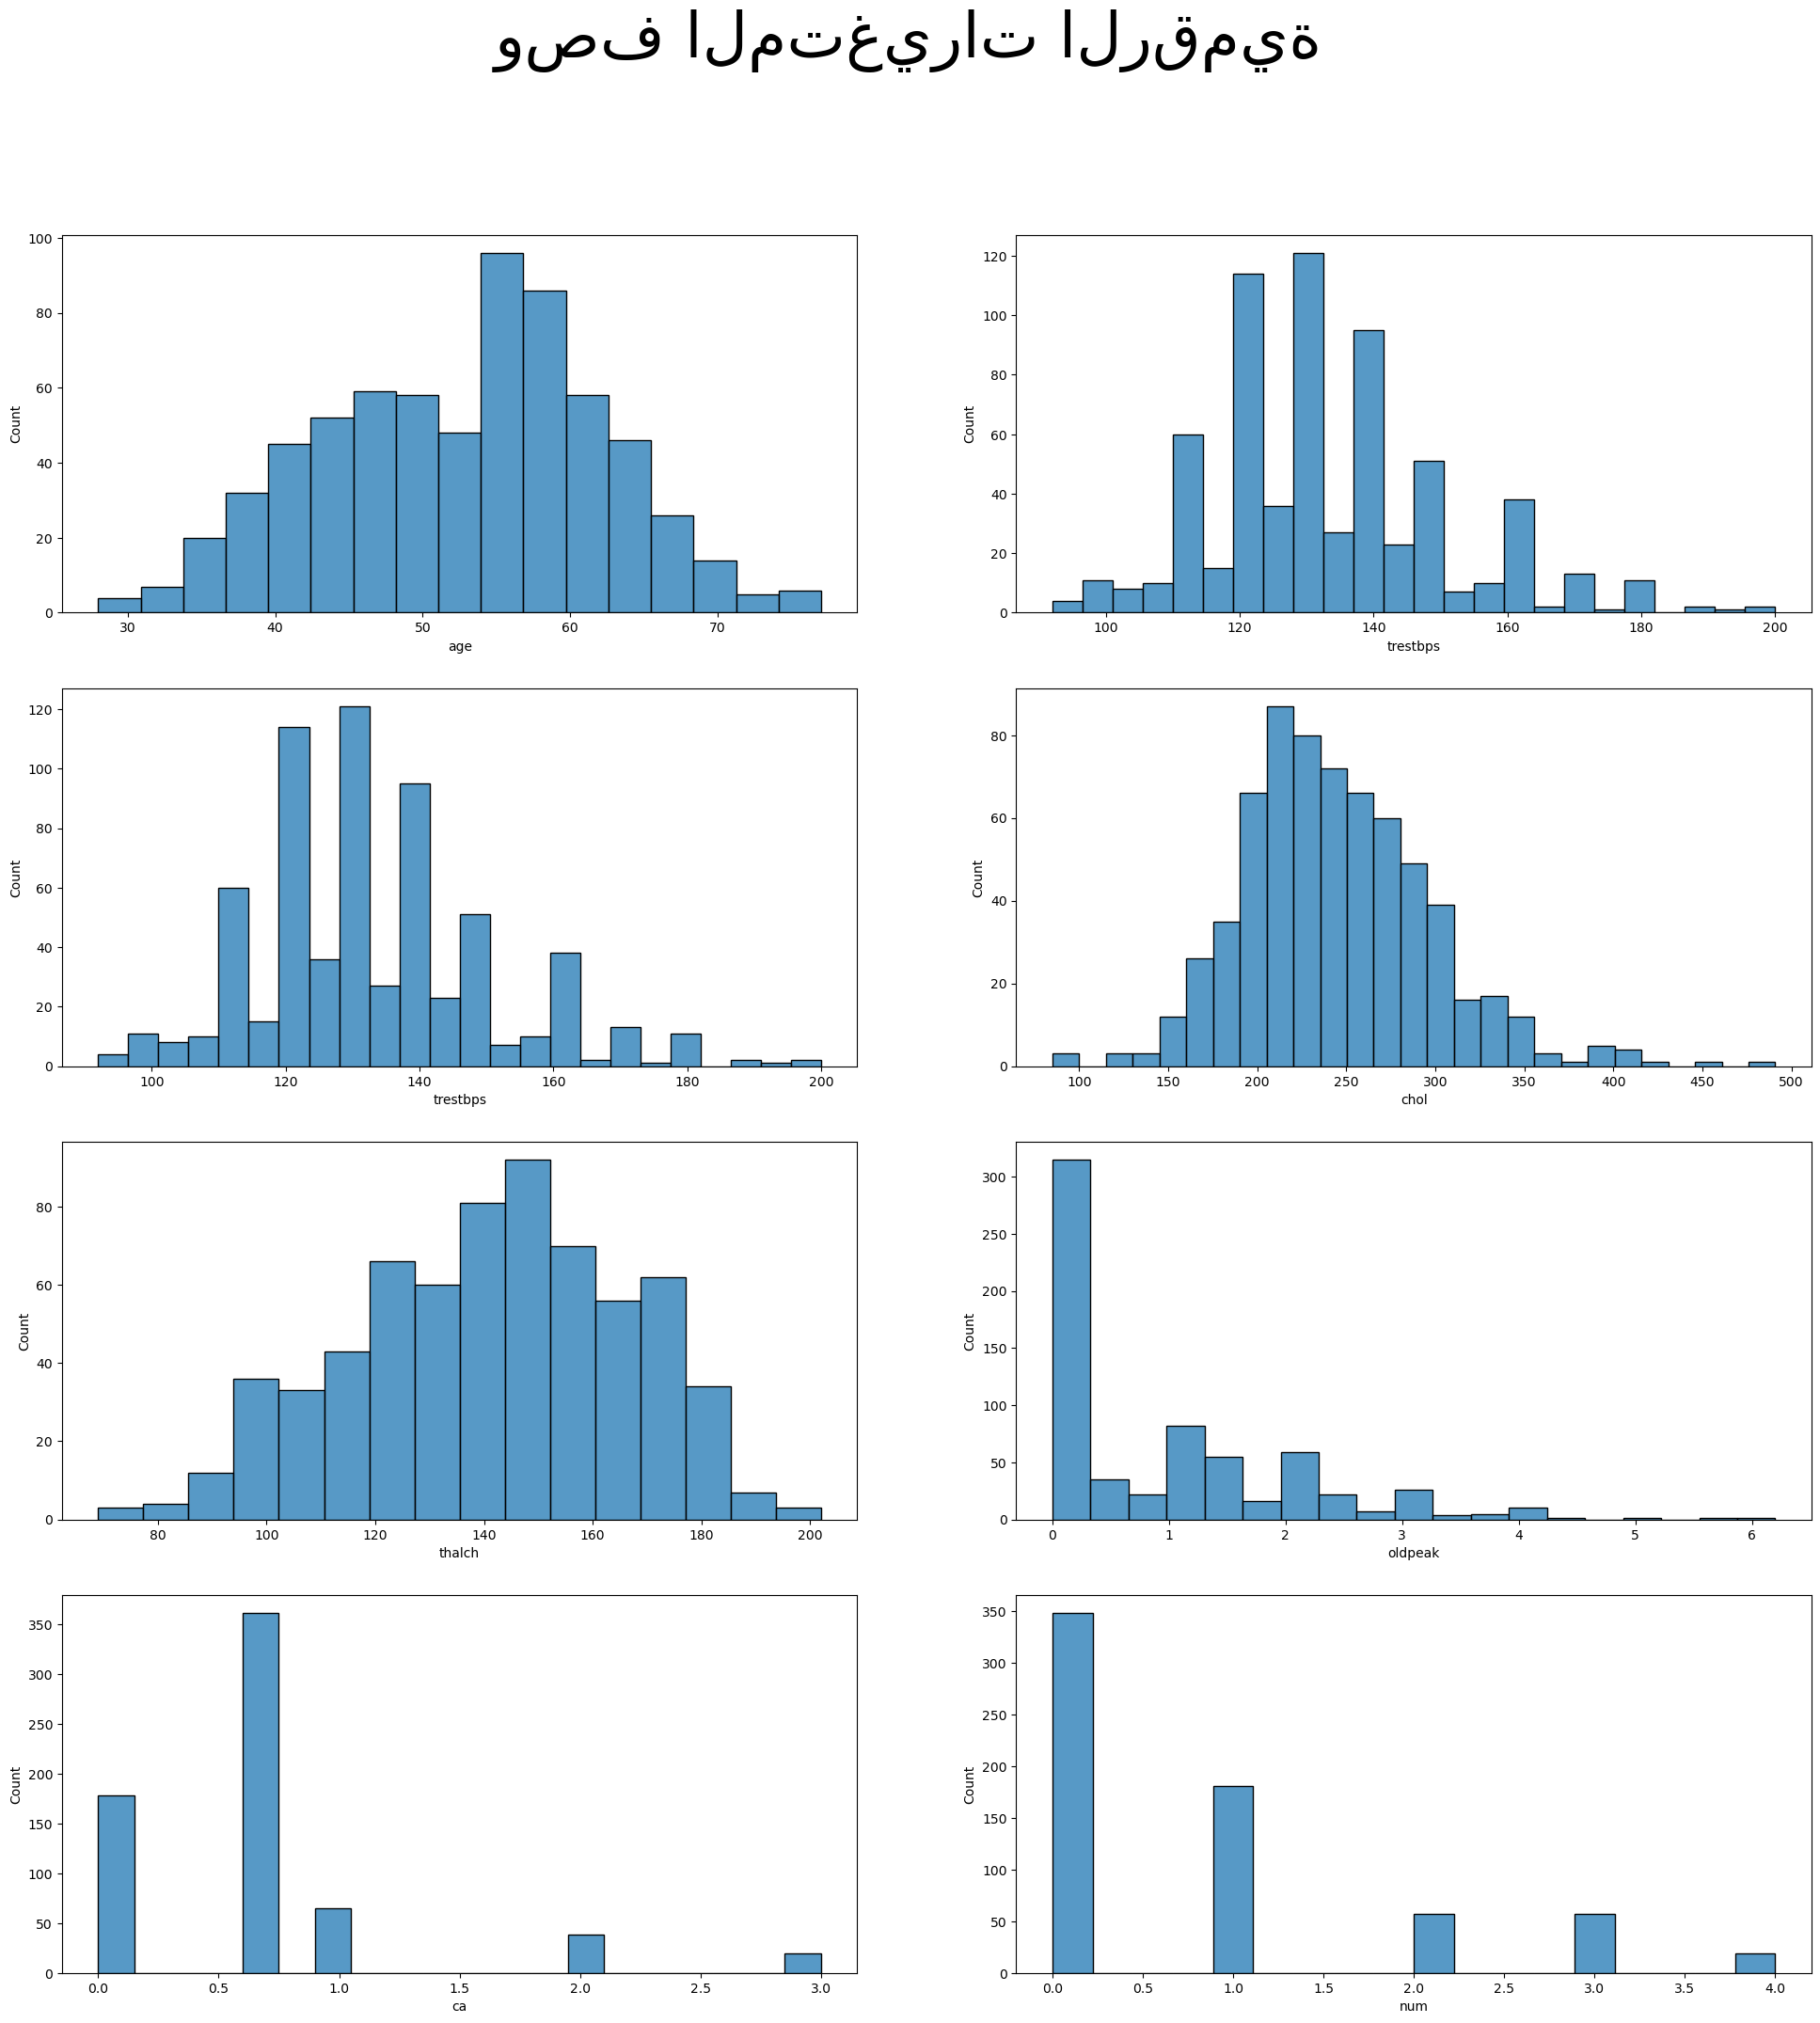

In [13]:

# تحديد الااعمدة الرقمية في إطار البيانات
numeric_columns = ['age', 'trestbps', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

# انشاء شبكة من الرسومات البيانية مع 4 صفوف و2 عمود، وتحديد حجم الشكل
fig, axes = plt.subplots(4, 2, figsize=(24, 24))
fig.suptitle('Numeric Columns Discribe', size=48)

# رسم مخططات التوزيع Histogram لكل عمود رقمي
for i in range(4):
    for n in range(2):
        sns.histplot(df[numeric_columns[2*i+n]], ax=axes[i, n])


In [36]:
# حساب عدد مرات تكرار كل قيمة في العمود 'num'
df.num.value_counts()


num
0    348
1    181
2     57
3     57
4     19
Name: count, dtype: int64

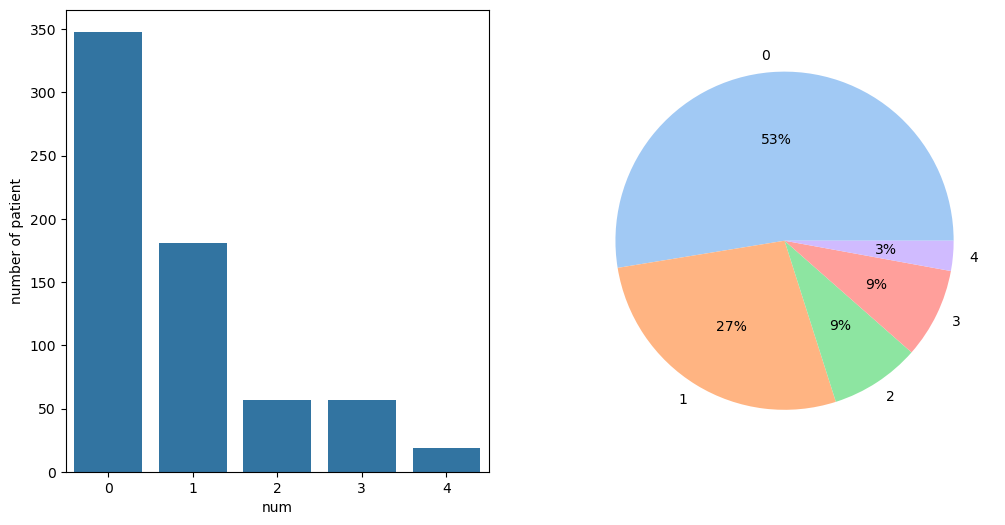

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# رسم مخطط دائري لعدد مرات تكرار القيم
ax[1].pie(df.num.value_counts(), labels=['0', '1', '2', '3', '4'], autopct='%.0f%%', colors=sns.color_palette('pastel'))

# رسم مخطط أعمدة لعدد مرات تكرار القيم
cp = sns.countplot(x=df['num'], ax=ax[0])

# تعيين عناوين المحاور
ax[0].set_xlabel('num')
ax[0].set_ylabel('number of patient')

plt.show()


<Axes: xlabel='age', ylabel='Count'>

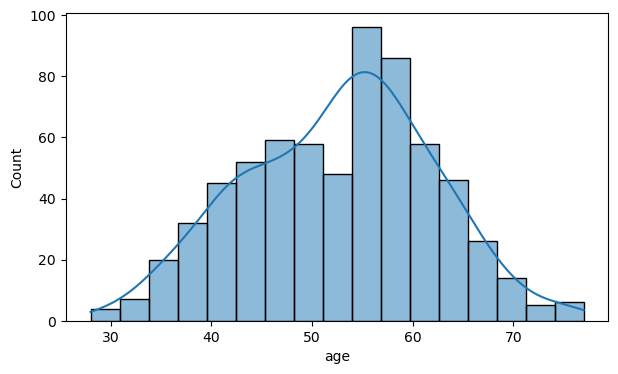

In [40]:
plt.figure(figsize=(7,4))
sns.histplot(df['age'],kde=True)

In [41]:
# حساب عدد مرات تكرار الأعمار بناء على الجنس  
print(df.groupby('sex')['age'].value_counts())


sex     age
Female  54     14
        51     10
        62      8
        43      8
        58      7
               ..
Male    33      1
        72      1
        71      1
        28      1
        31      1
Name: count, Length: 88, dtype: int64


<Axes: xlabel='age', ylabel='count'>

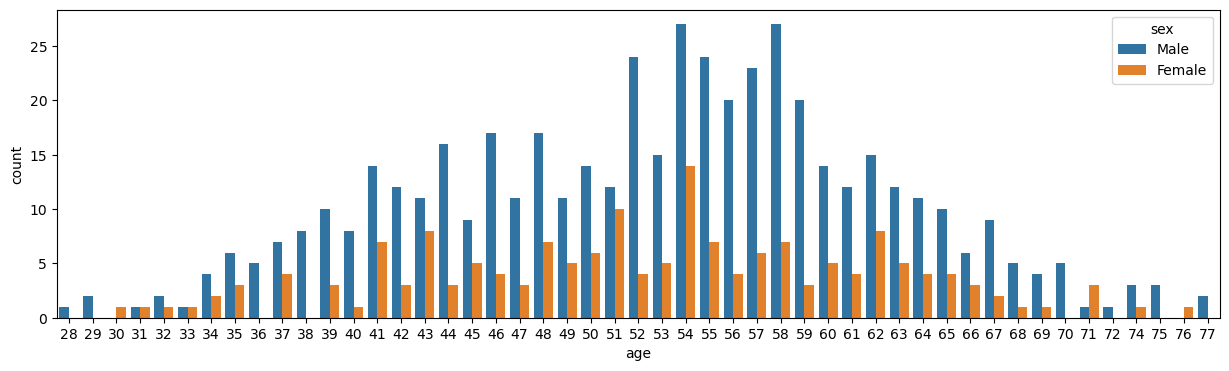

In [42]:
plt.figure(figsize=(15,4))
sns.countplot(df, x='age', hue='sex')

<Axes: xlabel='sex', ylabel='count'>

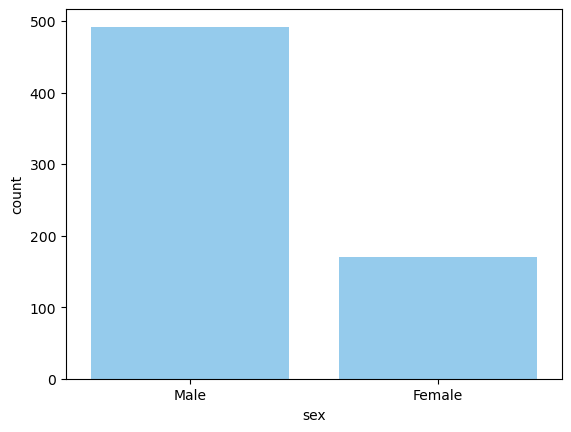

In [43]:
sns.countplot(data=df,x='sex',color='#87CEFA')

In [44]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [45]:
value_counts = df['num'].value_counts()
value_counts

num
0    348
1    181
2     57
3     57
4     19
Name: count, dtype: int64

In [46]:
from imblearn.over_sampling import RandomOverSampler

# فصل الأعمدة المستخدمة في النمزدج عن عمود التارقت 
input_columns = df.drop('num', axis=1)  

#تحديد عمود التارقت
class_column = df['num']

#انشاء كائن
oversampler = RandomOverSampler(random_state=0)

#تطبيق الزيادة العشوائية 
input_columns_resampled, class_column_resampled = oversampler.fit_resample(input_columns, class_column)

#دمج الاعمدة
df = pd.concat([input_columns_resampled, class_column_resampled], axis=1)

In [47]:
class_distribution = df['num'].value_counts()
class_distribution

num
0    348
2    348
1    348
3    348
4    348
Name: count, dtype: int64

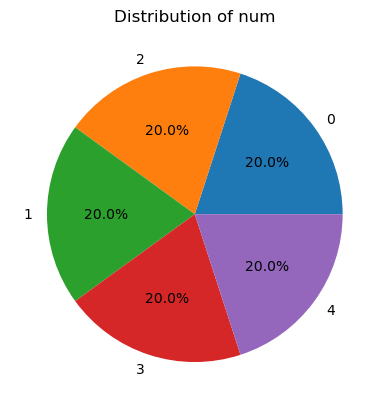

In [48]:
value_counts = df['num'].value_counts()

labels = value_counts.index

counts = value_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of num')

plt.show()

In [49]:
#تحديد اعمدو x
x = df.iloc[:, 1:15].values
print(x)

[[63 'Male' 'Cleveland' ... 'downsloping' 0.0 'fixed defect']
 [67 'Male' 'Cleveland' ... 'flat' 3.0 'normal']
 [67 'Male' 'Cleveland' ... 'flat' 2.0 'reversable defect']
 ...
 [61 'Male' 'Cleveland' ... 'flat' 1.0 'normal']
 [65 'Male' 'VA Long Beach' ... 'downsloping' 0.6677740863787376
  'unknown']
 [62 'Male' 'VA Long Beach' ... 'flat' 0.6677740863787376 'unknown']]


In [50]:
#تحديد عمود y
y = df.iloc[:, 15].values
print(y)

[0 2 1 ... 4 4 4]


In [51]:
from sklearn.preprocessing import LabelEncoder

#استخدام الترميز لتحويل الاعمدة النصية الى قيم فئوية
labelencoder_sex = LabelEncoder()
x[:, 1] = labelencoder_sex.fit_transform(x[:, 1])

labelencoder_fbs = LabelEncoder()
x[:, 6] = labelencoder_fbs.fit_transform(x[:, 6])

labelencoder_exang = LabelEncoder()
x[:, 9] = labelencoder_exang.fit_transform(x[:, 9])

In [52]:
print(x[:, 1])
print(x[:, 6])

[1 1 1 ... 1 1 1]
[1 0 0 ... 0 0 1]


In [53]:
from joblib import dump

# بيانات تدريبية
data = ["True", "False"]

# تدريب LabelEncoder
labelencoder_exang = LabelEncoder()
labelencoder_exang.fit(data)
print(labelencoder_exang.classes_)

# حفظ LabelEncoder
dump(labelencoder_exang, "exang_label_encoder.pkl")


['False' 'True']


['exang_label_encoder.pkl']

In [54]:
data = ["True", "False"]

labelencoder_fbs = LabelEncoder()
labelencoder_fbs.fit(data)
print(labelencoder_fbs.classes_)

dump(labelencoder_fbs, "fbs_label_encoder.pkl")

['False' 'True']


['fbs_label_encoder.pkl']

In [55]:
print(labelencoder_fbs.classes_)  


['False' 'True']


In [56]:
import numpy as np

distinct_values = np.unique(x[:, 2])
print(distinct_values)

['Cleveland' 'Hungary' 'VA Long Beach']


In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# تشفير الاعمدة بهده الطريقة يضمن عدم تفضيل قيم على الاخرى
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(categories='auto'), [2, 3, 7, 11, -1])],
    remainder='passthrough')

x= ct.fit_transform(x)

x

array([[1.0, 0.0, 0.0, ..., 0, 2.3, 0.0],
       [1.0, 0.0, 0.0, ..., 1, 1.5, 3.0],
       [1.0, 0.0, 0.0, ..., 1, 2.6, 2.0],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 3.6, 1.0],
       [0.0, 0.0, 1.0, ..., 1, 4.0, 0.6677740863787376],
       [0.0, 0.0, 1.0, ..., 1, 3.0, 0.6677740863787376]], dtype=object)

In [58]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى مجموعات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# إنشاء كائن لتقييس البيانات  
scaler = StandardScaler()

# تقييس بيانات التدريب
X_train_scaled = scaler.fit_transform(X_train)

# تقييس بيانات الاختبار
X_test_scaled = scaler.transform(X_test)

# إنشاء نموذج الانحدار اللوجستي
model = LogisticRegression()

# تدريب النموذج على بيانات التدريب المقيّسة
model.fit(X_train_scaled, y_train)

# التنبؤ بالقيم باستخدام بيانات الاختبار
y_pred = model.predict(X_test)

# حساب الدقة بين التنبؤات والقيم الحقيقية
accuracy = accuracy_score(y_test, y_pred)

# طباعة النتيجة النهائية للدقة
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 25.06%


In [60]:
# التنبؤ بالفئات باستخدام بيانات الاختبار
y_pred = model.predict(X_test)


In [61]:
# حساب الدقة من خلال مقارنة القيم المتوقعة بالقيم الحقيقية
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 25.06%


In [62]:
from sklearn.tree import DecisionTreeClassifier

# إنشاء نموذج شجرة القرار
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 91.49%


In [63]:
# إنشاء نموذج شجرة القرار مع ضبط المعلمات max_depth و min_samples_split
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

# تدريب النموذج على بيانات التدريب
model.fit(X_train, y_train)

# التنبؤ بالقيم باستخدام بيانات الاختبار
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy after tuning: {accuracy * 100:.2f}%')


Accuracy after tuning: 57.70%


In [64]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 91.38%


In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score
# حساب الدقة (Precision) باستخدام القيم المتوقعة والقيم الحقيقية
precision = precision_score(y_test, y_pred, average='macro')  
#حساب الاسترجاع (Recall)وهو نسبة العينات المصنفة 
recall = recall_score(y_test, y_pred, average='macro')

#حساب مقياس F1 وهو المتوسط التوافقي بين الدقة والاسترجاع
f1 = f1_score(y_test, y_pred, average='macro')

print('Precision: {:.2f}%'.format(100 * precision))
print('Recall: {:.2f}%'.format(100 * recall))
print('F1 Score: {:.2f}%'.format(100 * f1))


Precision: 91.54%
Recall: 91.84%
F1 Score: 91.63%


<Axes: >

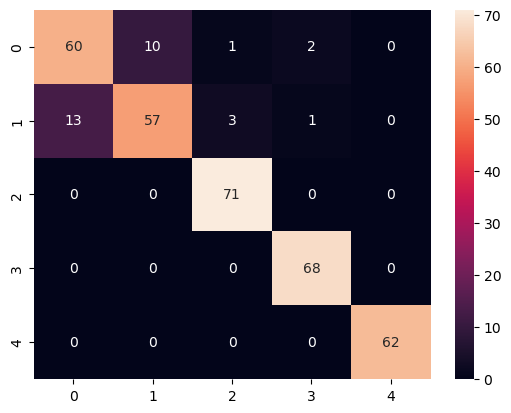

In [66]:
from sklearn.metrics import confusion_matrix
# حساب مصفوفة الارتباك
cf_matrix = confusion_matrix(y_test, y_pred)
# رسم خريطة حرارية لمصفوفة الارتباك مع إضافة القيم لكل خلية
sns.heatmap(cf_matrix, annot=True)

In [67]:
model = RandomForestClassifier()
# تدريب النموذج باستخدام البيانات
model.fit(x,y)

RandomForestClassifier()

In [68]:
import pickle


# تحديد اسم الملف الذي سيتم حفظ النموذج فيه
filename = 'classification_model.pkl'
# فتح الملف بوضع الكتابة الثنائية (wb) وحفظ النموذج باستخدام pickle
with open(filename, 'wb') as file:
    pickle.dump(model, file)


In [69]:


# تحميل النموذج من الملف
filename = 'classification_model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)


In [70]:
from joblib import dump
# حفظ كائنات LabelEncoder
dump(labelencoder_sex, "sex_label_encoder.pkl")
dump(labelencoder_fbs, "fbs_label_encoder.pkl")
dump(labelencoder_exang, "exang_label_encoder.pkl")

['exang_label_encoder.pkl']

In [71]:
dump(ct, "ct_column_transformer.pkl")

['ct_column_transformer.pkl']

In [72]:
dump(scaler, "standard_scaler.pkl")

['standard_scaler.pkl']

In [73]:
new_patient = np.array( [[56, 'Female', 'Cleveland', 'typical angina', 130, 236, 'True' , 'normal', 150, 'False', 1.4, 'flat',  2, 'fixed defect']])

In [74]:
from joblib import load
#احميل الكائنات لاستخدامها
labelencoder_sex_loaded=load("sex_label_encoder.pkl")
labelencoder_fbs_loaded=load("fbs_label_encoder.pkl")
labelencoder_exang_loaded=load("exang_label_encoder.pkl")


#تشفير اعمدة المثال 
new_patient[:, 1] = labelencoder_sex_loaded.transform(new_patient[:, 1])
new_patient[:, 6] = labelencoder_fbs_loaded.transform(new_patient[:, 6])
new_patient[:, 9] = labelencoder_exang_loaded.transform(new_patient[:, 9])

In [75]:
ct_loaded = load("ct_column_transformer.pkl")

new_patient = ct.transform(new_patient)

In [76]:
sc_loaded = load("standard_scaler.pkl")

new_patient = sc_loaded.transform(new_patient)
print(new_patient)

[[ 0.93397532 -0.50358942 -0.59829797 -1.59266612 -0.33968311 -0.39223227
   4.55521679 -0.70223572  1.05111308 -0.48558774 -0.06201737 -0.39093075
   0.96757521 -0.49040218 -0.43169855  3.45265001 -0.43044872 -0.74651138
  -0.83091185 -0.06190933 -2.18502547 -0.35496599 -0.21882327  1.95333002
   0.66179113 -1.12151035 -0.08115787  1.25060704]]


In [77]:

model = load('classification_model.pkl')


In [78]:
with open('classification_model.pkl', 'rb') as file:
    model = pickle.load(file)


In [79]:
# حساب احتمالات التصنيف للنموذج باستخدام بيانات جديدة
pred_proba = model.predict_proba(new_patient)
print('Predicted probabilities:', pred_proba)
# التنبؤ بالفئة باستخدام بيانات جديدة
pred_class = model.predict(new_patient)
print('Predicted class:', pred_class)


Predicted probabilities: [[0.46 0.26 0.2  0.06 0.02]]
Predicted class: [0]
